# 🏝️**Sistem Rekomendasi Tempat Wisata Content Based Filtering & Collaborative Filtering**🏕️

## Author and creator by : Muhamad Fajri Permana Haryanto

# **🧠 Project Overview**

Pariwisata merupakan salah satu sektor unggulan dalam pembangunan ekonomi Indonesia yang berkontribusi secara signifikan terhadap Produk Domestik Bruto (PDB), penciptaan lapangan kerja, dan distribusi pendapatan antarwilayah. Namun, dengan ribuan destinasi yang tersebar dari Sabang hingga Merauke, wisatawan domestik maupun mancanegara kerap mengalami kesulitan dalam memilih tempat wisata yang sesuai dengan minat dan preferensi mereka [1].

Seiring dengan pesatnya pertumbuhan teknologi digital, sistem rekomendasi (recommender systems) mulai digunakan secara luas dalam berbagai sektor, termasuk pariwisata, untuk meningkatkan pengalaman pengguna dalam memilih produk atau layanan secara personal [2]. Dua pendekatan paling umum dalam sistem rekomendasi adalah Content-Based Filtering (CBF) dan Collaborative Filtering (CF). CBF bekerja dengan menganalisis karakteristik item dan preferensi pengguna, sementara CF mengandalkan kesamaan perilaku antar pengguna untuk memberikan saran [3].

Mengingat masih terbatasnya penerapan sistem rekomendasi berbasis personalisasi di sektor pariwisata Indonesia, penelitian ini menjadi relevan dan penting. Dengan memanfaatkan dataset "Indonesia Tourism Destination" dari Kaggle, proyek ini bertujuan mengembangkan sistem rekomendasi yang mampu memberikan saran tempat wisata secara cerdas dan terpersonalisasi berdasarkan pendekatan CBF dan CF, serta menganalisis keunggulan masing-masing pendekatan dalam konteks data real-world.

# **🎯 Business Understanding**

### content based filtering

1. Menganalisis fitur-fitur destinasi (misal: kategori wisata, lokasi) menggunakan representasi berbasis TF-IDF atau embedding teks.

2. Menghitung kesamaan antar item menggunakan cosine similarity.

3. Membuat profil pengguna berdasarkan destinasi yang disukai, lalu merekomendasikan destinasi dengan profil serupa.

### collaborative filtering

1. Menggunakan pendekatan User-User atau Item-Item untuk mendeteksi pola kesamaan preferensi antar pengguna.

2. Mengimplementasikan teknik Singular Value Decomposition (SVD) untuk mengatasi masalah data sparsity.

3. Menghasilkan prediksi rating destinasi bagi pengguna yang belum pernah mengunjunginya, berdasarkan preferensi pengguna serupa.

# **🔍 Data Understanding**

## Import Library

In [1]:
import os
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

In [2]:
!mkdir -p ~/.kaggle
!echo '{"username":"fajriharyanto","key":"998acd734e359f906329500715f20f7e"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 372MB/s]


In [3]:
!unzip -q indonesia-tourism-destination.zip -d /content

In [4]:
!ls

indonesia-tourism-destination.zip  sample_data	       tourism_with_id.csv
package_tourism.csv		   tourism_rating.csv  user.csv


In [5]:
Destinations_df = pd.read_csv("/content/tourism_with_id.csv")
Destinations_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [6]:
Reviews_df = pd.read_csv("/content/tourism_rating.csv")
Reviews_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


## Data Type Information

In [7]:
Destinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [8]:
Reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
print('Jumlah data wisata yang tersedia', len(Destinations_df.Place_Id.unique()))
print('Jumlah tempat wisata yang tersedia', len(Destinations_df.Place_Name.unique()))
print('Kategori tempat wisata yang tersedia: ', len(Destinations_df.Category.unique()))
print('jumlah daerah tempat wisata yang tersedia', len(Destinations_df.City.unique()))
print('Jumlah data user yang melakukan review', len(Reviews_df.User_Id.unique()))

Jumlah data wisata yang tersedia 437
Jumlah tempat wisata yang tersedia 437
Kategori tempat wisata yang tersedia:  6
jumlah daerah tempat wisata yang tersedia 5
Jumlah data user yang melakukan review 300


# **📈 Univariate Exploratory Data Analysis**

## Destinations Variabel

In [10]:
Destinations_df.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [11]:
Destinations_df.shape

(437, 13)

In [12]:
Destinations_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [13]:
Destinations_df.tail()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436
436,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,NaN,437


In [14]:
print('Jumlah data wisata yang tersedia', len(Destinations_df.Place_Id.unique()))
print('Jumlah tempat wisata yang tersedia', len(Destinations_df.Place_Name.unique()))
print('Kategori tempat wisata yang tersedia: ', len(Destinations_df.Category.unique()))
print('jumlah daerah tempat wisata yang tersedia', len(Destinations_df.City.unique()))

Jumlah data wisata yang tersedia 437
Jumlah tempat wisata yang tersedia 437
Kategori tempat wisata yang tersedia:  6
jumlah daerah tempat wisata yang tersedia 5


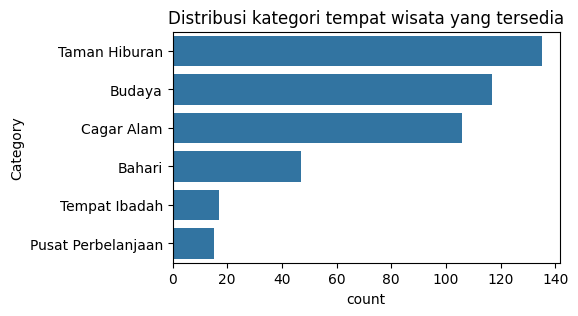

In [15]:
plt.figure(figsize=(5, 3))
sns.countplot(y=Destinations_df['Category'], order=Destinations_df['Category'].value_counts().index)
plt.title('Distribusi kategori tempat wisata yang tersedia')
plt.show()

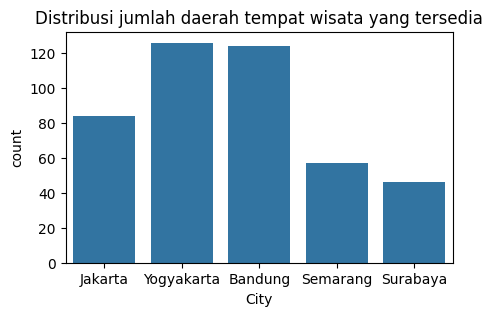

In [16]:
plt.figure(figsize=(5, 3))
sns.countplot(data=Destinations_df, x='City')
plt.title('Distribusi jumlah daerah tempat wisata yang tersedia')
plt.show()

## Reviews Variabel

In [17]:
Reviews_df.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [18]:
Reviews_df.shape

(10000, 3)

In [19]:
Reviews_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [20]:
Reviews_df.tail()

,User_Id,Place_Id,Place_Ratings
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4
9999,300,163,2


In [21]:
print('Jumlah data tempat yang tersedia', len(Reviews_df.Place_Id.unique()))
print('Jumlah data user yang tersedia', len(Reviews_df.User_Id.unique()))
print('Jumlah data place rating', len(Reviews_df.Place_Ratings.unique()))
print('Jumlah data reviews', len(Reviews_df))

Jumlah data tempat yang tersedia 437
Jumlah data user yang tersedia 300
Jumlah data place rating 5
Jumlah data reviews 10000


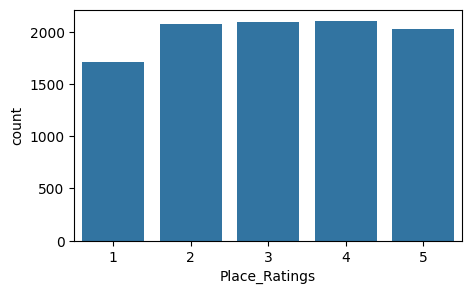

In [22]:
plt.figure(figsize=(5, 3))
sns.countplot(data=Reviews_df, x=Reviews_df['Place_Ratings'])
plt.show()

# **🧹 Data Preprocessing**

## Combining Tourist Attraction Data

In [23]:
Tour_all = np.concatenate((
    Destinations_df.Place_Id.unique(),
    Reviews_df.Place_Id.unique()
), axis=0)

Tour_all = np.sort(np.unique(Tour_all))

print('Jumlah data wisata yang tersedia', len(Tour_all))

Jumlah data wisata yang tersedia 437


## Missing Value Cross Check

In [24]:
Destinations_df.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [25]:
Reviews_df.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


## Duplicated Cross Check

In [26]:
print("Jumlah data duplikat pada destinasi: ", Destinations_df.duplicated().sum())
print("Jumlah data duplikat pada rewiew: ", Reviews_df.duplicated().sum())

Jumlah data duplikat pada destinasi:  0
Jumlah data duplikat pada rewiew:  79


In [27]:
duplicated = Reviews_df[Reviews_df.duplicated(keep=False)]
print(duplicated)

      User_Id  Place_Id  Place_Ratings
25          1       328              2
29          1       328              2
120         5       321              3
129         5       321              3
134         5       301              2
...       ...       ...            ...
9690      291       431              4
9807      295       403              1
9814      295       403              1
9855      296       177              4
9860      296       177              4

[158 rows x 3 columns]


# **🍳 Data Preparation**

## Overcoming Missing Value

In [28]:
Destinations_df = Destinations_df.drop(columns=['Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], errors='ignore')
Destinations_df.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0


In [29]:
Destinations_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5


## Overcoming data duplication

In [30]:
Reviews_df.drop_duplicates
Reviews_df.duplicated().sum()

np.int64(79)

## Convert a series to a list

In [31]:
tour_id = Destinations_df['Place_Id'].tolist()
tour_name = Destinations_df['Place_Name'].tolist()
tour_category = Destinations_df['Category'].tolist()

print('\nJumlah ID wisata:', len(tour_id))
print('Jumlah Nama wisata:', len(tour_name))
print('Jumlah Kategori wisata:', len(tour_category))


Jumlah ID wisata: 437
Jumlah Nama wisata: 437
Jumlah Kategori wisata: 437


## Create a dictionary for the dataset

In [32]:
tour_df = pd.DataFrame({
    'id': tour_id,
    'tour_name': tour_name,
    'category': tour_category
})

In [33]:
tour_df

,id,tour_name,category
0,1,Monumen Nasional,Budaya
1,2,Kota Tua,Budaya
2,3,Dunia Fantasi,Taman Hiburan
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,5,Atlantis Water Adventure,Taman Hiburan
...,...,...,...
432,433,Museum Mpu Tantular,Budaya
433,434,Taman Bungkul,Taman Hiburan
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan
435,436,Taman Flora Bratang Surabaya,Taman Hiburan


# **🧭 Model Development dengan Content Based Filtering**

## Variabel Cross Check

In [34]:
data = tour_df
data.sample(5)

,id,tour_name,category
425,426,Balai Kota Surabaya,Budaya
320,321,Glamping Lakeside Rancabali,Taman Hiburan
41,42,Museum Seni Rupa dan Kramik,Budaya
278,279,Masjid Agung Trans Studio Bandung,Tempat Ibadah
294,295,Museum Nike Ardilla,Budaya


## TF-IDF Vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(data['category'])
tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah',
       'perbelanjaan', 'pusat', 'taman', 'tempat'], dtype=object)

In [36]:
tfidf_matrix = tf.fit_transform(data['category'])
tfidf_matrix.shape

(437, 10)

In [37]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.70710678]])

In [38]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.tour_name
).sample(22, axis=1, replace=True).sample(10, axis=0)

,taman,hiburan,perbelanjaan,alam,bahari,pusat,tempat,ibadah,cagar,bahari,...,ibadah,tempat,ibadah,budaya,perbelanjaan,ibadah,alam,budaya,alam,budaya
tour_name,,,,,,,,,,,,,,,,,,,,,
Wisata Alam Kalibiru,0.000000,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.000000,0.707107,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.707107,0.0
Museum Sri Baduga,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.0,0.000000,1.0
Goa Cerme,0.000000,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.000000,0.707107,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.707107,0.0
Pesona Nirwana Waterpark & Cottages,0.707107,0.707107,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
Curug Cimahi,0.000000,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.000000,0.707107,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.707107,0.0
Taman Badak,0.707107,0.707107,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
Museum Kereta Ambarawa,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.0,0.000000,1.0
Watu Lumbung,0.000000,0.000000,0.0,0.707107,0.0,0.0,0.000000,0.000000,0.707107,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.707107,0.0
Masjid Nasional Al-Akbar,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.707107,0.707107,0.000000,0.0,...,0.707107,0.707107,0.707107,0.0,0.0,0.707107,0.000000,0.0,0.000000,0.0


## Cosine Similarity

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [40]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['tour_name'], columns=data['tour_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


tour_name,Ciwangun Indah Camp Official,NuArt Sculpture Park,Taman Menteng,Kampung Wisata Sosro Menduran,Keraton Yogyakarta
tour_name,,,,,
Air Terjun Kali Pancur,1.0,0.0,0.0,0.0,0.0
Heha Sky View,0.0,1.0,1.0,0.0,0.0
Pantai Maron,0.0,0.0,0.0,0.0,0.0
Puncak Pinus Becici,0.0,1.0,1.0,0.0,0.0
Museum Barli,0.0,0.0,0.0,1.0,1.0
Museum Mpu Tantular,0.0,0.0,0.0,1.0,1.0
Curug Cipanas,1.0,0.0,0.0,0.0,0.0
Kampung Batik Gedong Semarang,0.0,0.0,0.0,1.0,1.0
Curug Dago,1.0,0.0,0.0,0.0,0.0


## Recommendation testing

In [41]:
def tour_recommendation(place_name, top_k=5, similarity_data=cosine_sim_df, items=data[['tour_name', 'category']]):
    # Ambil rekomendasi tempat wisata berdasarkan nama tempat
    place_index = items[items['tour_name'].str.lower() == place_name.lower()].index
    if len(place_index) == 0:
        print(f"Tempat wisata dengan nama '{place_name}' tidak ditemukan.")
        return pd.DataFrame()

    sim_scores = list(enumerate(similarity_data.iloc[place_index[0]]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_k + 1]
    place_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Simpan similarity_score tapi tidak ditampilkan
    recommendations = items.iloc[place_indices].copy()
    recommendations['similarity_score'] = similarity_scores

    # Ambil kategori dari tempat wisata input
    query_category = data[data['tour_name'].str.lower() == place_name.lower()]['category'].values[0]
    query_categories = set(query_category.lower().replace(", ", ",").split(","))

    total_overlap = 0
    category_counts = []

    # Evaluasi kategori
    for _, row in recommendations.iterrows():
        rec_categories = set(row['category'].lower().replace(", ", ",").split(","))
        overlap = query_categories.intersection(rec_categories)
        total_overlap += len(overlap)
        category_counts.append(len(rec_categories))

    precision_at_k = total_overlap / sum(category_counts) if category_counts else 0

    print(f"Evaluasi untuk rekomendasi tempat yang mirip '{place_name}':")
    print(f"Tempat wisata yang pernah dikunjungi: {place_name} (Kategori: {query_categories})")
    print(f"\nRekomendasi Tempat Wisata Lainnya {top_k}:")

    # Tampilkan hanya kolom tour_name dan category
    display(recommendations[['tour_name', 'category']])


In [42]:
tour_recommendation("Rabbit Town")

Evaluasi untuk rekomendasi tempat yang mirip 'Rabbit Town':
Tempat wisata yang pernah dikunjungi: Rabbit Town (Kategori: {'taman hiburan'})

Rekomendasi Tempat Wisata Lainnya 5:


,tour_name,category
3,Taman Mini Indonesia Indah (TMII),Taman Hiburan
4,Atlantis Water Adventure,Taman Hiburan
5,Taman Impian Jaya Ancol,Taman Hiburan
7,Ocean Ecopark,Taman Hiburan
18,Kidzania,Taman Hiburan


# **🤝 Model Development dengan Collaborative Filtering**

## Data loading

In [43]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [44]:
user = Reviews_df
user

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

Mengubah User_Id menjadi list tanpa nilai yang sama

In [45]:
user = Reviews_df['User_Id'].unique().tolist()
print('list User_Id: ', user)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

Melakukan encoding User_Id

In [46]:
user_to_user_encoded = {x: i for i, x in enumerate(user)}
print('encoded userID : ', user_to_user_encoded)

encoded userID :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119,

Melakukan proses encoding angka ke ke User_Id

In [47]:
user_encoded_to_user = {i: x for i, x in enumerate(user)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded angka ke userID:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 1

Mengubah Place_Id menjadi list tanpa nilai yang sama


In [48]:
tour = Reviews_df['Place_Id'].unique().tolist()
print('list Place_Id: ', tour)

list Place_Id:  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 1

Melakukan proses encoding Place_Id

In [49]:
tour_to_tour_encoded = {x: i for i, x in enumerate(tour)}
print('encoded Place_Id: ', tour_to_tour_encoded)

encoded Place_Id:  {179: 0, 344: 1, 5: 2, 373: 3, 101: 4, 312: 5, 258: 6, 20: 7, 154: 8, 393: 9, 103: 10, 208: 11, 89: 12, 405: 13, 41: 14, 336: 15, 67: 16, 292: 17, 222: 18, 76: 19, 428: 20, 15: 21, 246: 22, 265: 23, 21: 24, 328: 25, 307: 26, 302: 27, 48: 28, 147: 29, 2: 30, 322: 31, 23: 32, 85: 33, 371: 34, 78: 35, 111: 36, 107: 37, 185: 38, 413: 39, 389: 40, 437: 41, 105: 42, 176: 43, 407: 44, 281: 45, 167: 46, 384: 47, 426: 48, 390: 49, 367: 50, 166: 51, 18: 52, 321: 53, 262: 54, 223: 55, 17: 56, 319: 57, 310: 58, 421: 59, 202: 60, 283: 61, 250: 62, 118: 63, 54: 64, 70: 65, 33: 66, 227: 67, 86: 68, 249: 69, 131: 70, 382: 71, 193: 72, 104: 73, 24: 74, 128: 75, 134: 76, 228: 77, 237: 78, 100: 79, 198: 80, 50: 81, 376: 82, 268: 83, 242: 84, 82: 85, 348: 86, 409: 87, 88: 88, 4: 89, 377: 90, 43: 91, 91: 92, 44: 93, 14: 94, 406: 95, 383: 96, 229: 97, 290: 98, 294: 99, 309: 100, 74: 101, 97: 102, 138: 103, 436: 104, 395: 105, 300: 106, 68: 107, 55: 108, 434: 109, 9: 110, 151: 111, 61: 112

Melakukan proses encoding angka ke Place_Id

In [50]:
tour_encoded_to_tour = {i: x for i, x in enumerate(tour)}
print('encoded angka ke Place_Id: ', tour_encoded_to_tour)

encoded angka ke Place_Id:  {0: 179, 1: 344, 2: 5, 3: 373, 4: 101, 5: 312, 6: 258, 7: 20, 8: 154, 9: 393, 10: 103, 11: 208, 12: 89, 13: 405, 14: 41, 15: 336, 16: 67, 17: 292, 18: 222, 19: 76, 20: 428, 21: 15, 22: 246, 23: 265, 24: 21, 25: 328, 26: 307, 27: 302, 28: 48, 29: 147, 30: 2, 31: 322, 32: 23, 33: 85, 34: 371, 35: 78, 36: 111, 37: 107, 38: 185, 39: 413, 40: 389, 41: 437, 42: 105, 43: 176, 44: 407, 45: 281, 46: 167, 47: 384, 48: 426, 49: 390, 50: 367, 51: 166, 52: 18, 53: 321, 54: 262, 55: 223, 56: 17, 57: 319, 58: 310, 59: 421, 60: 202, 61: 283, 62: 250, 63: 118, 64: 54, 65: 70, 66: 33, 67: 227, 68: 86, 69: 249, 70: 131, 71: 382, 72: 193, 73: 104, 74: 24, 75: 128, 76: 134, 77: 228, 78: 237, 79: 100, 80: 198, 81: 50, 82: 376, 83: 268, 84: 242, 85: 82, 86: 348, 87: 409, 88: 88, 89: 4, 90: 377, 91: 43, 92: 91, 93: 44, 94: 14, 95: 406, 96: 383, 97: 229, 98: 290, 99: 294, 100: 309, 101: 74, 102: 97, 103: 138, 104: 436, 105: 395, 106: 300, 107: 68, 108: 55, 109: 434, 110: 9, 111: 151

Mapping User_Id ke dataframe USER


In [51]:
Reviews_df['USER'] = Reviews_df['User_Id'].map(user_to_user_encoded)

Mapping Place_Id ke dataframe TOUR


In [52]:
Reviews_df['TOUR'] = Reviews_df['Place_Id'].map(tour_to_tour_encoded)

Menampilkan sample data setelah mapping

In [53]:
display(Reviews_df.head())

,User_Id,Place_Id,Place_Ratings,USER,TOUR
0,1,179,3,0,0
1,1,344,2,0,1
2,1,5,5,0,2
3,1,373,3,0,3
4,1,101,4,0,4


## Training data and data validation

### Training Process

In [54]:
Reviews_df = Reviews_df.sample(frac=1, random_state=42)
Reviews_df

,User_Id,Place_Id,Place_Ratings,USER,TOUR
6252,188,207,3,187,262
4684,142,268,2,141,83
1731,54,103,3,53,10
4742,144,119,3,143,141
4521,138,288,5,137,283
...,...,...,...,...,...
5734,173,402,5,172,175
5191,157,85,4,156,33
5390,163,18,3,162,52
860,28,416,4,27,187


In [55]:
x = Reviews_df[['USER', 'TOUR']].values

# Mengubah rating menjadi nilai float (normalisasi)
min_rating = Reviews_df['Place_Ratings'].min()
max_rating = Reviews_df['Place_Ratings'].max()
y = Reviews_df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * Reviews_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


### Building a Neural Network model


In [56]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_tours, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-3)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.tour_embedding = layers.Embedding(
            input_dim=num_tours,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-4)
        )
        self.tour_bias = layers.Embedding(num_tours, 1)

        self.dropout = layers.Dropout(0.5)
        self.batchnorm = layers.BatchNormalization()

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        tour_vector = self.tour_embedding(inputs[:, 1])
        tour_bias = self.tour_bias(inputs[:, 1])

        dot_user_place = tf.reduce_sum(user_vector * tour_vector, axis=1, keepdims=True)
        x = dot_user_place + user_bias + tour_bias

        x = self.batchnorm(x)
        x = self.dropout(x)

        return x

In [57]:
num_users = len(user_to_user_encoded)
num_tours = len(tour_to_tour_encoded)
model = RecommenderNet(num_users, num_tours, embedding_size=20)


model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

In [58]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=20,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.3674 - root_mean_squared_error: 0.5779 - val_loss: 0.2459 - val_root_mean_squared_error: 0.4771
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2034 - root_mean_squared_error: 0.4328 - val_loss: 0.1604 - val_root_mean_squared_error: 0.3872
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1396 - root_mean_squared_error: 0.3607 - val_loss: 0.1340 - val_root_mean_squared_error: 0.3563
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1167 - root_mean_squared_error: 0.3316 - val_loss: 0.1285 - val_root_mean_squared_error: 0.3505
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1125 - root_mean_squared_error: 0.3270 - val_loss: 0.1280 - val_root_mean_squared_error: 0.3504
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1112 - root_mean_squared_error: 0.3255 - val_loss: 0.1289 - val_root_mean_squared_error: 0.3517
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

### Metric Visualization

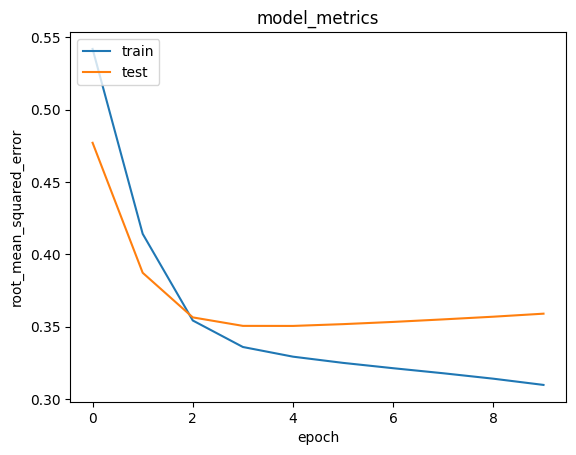

In [59]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **🧪 Evaluation**

## Tourist Attraction Recommendation Function

In [60]:
# Mengambil sample user
user_id = Reviews_df['User_Id'].sample(70).iloc[0]
print(f"User ID yang dipilih: {user_id}")

tours_visited_by_user = Reviews_df[Reviews_df['User_Id'] == user_id]
tour_ids_visited = tours_visited_by_user['Place_Id'].values
print(f"User ini telah mengunjungi {len(tour_ids_visited)} tempat.")

tours_not_visited = Destinations_df[~Destinations_df['Place_Id'].isin(tour_ids_visited)]
tours_not_visited_encoded = [
    tour_to_tour_encoded[x] for x in tours_not_visited['Place_Id'].values
    if x in tour_to_tour_encoded
]

user_encoded = user_to_user_encoded[user_id]
user_place_array = np.hstack([
    np.array([[user_encoded]] * len(tours_not_visited_encoded)),
    np.array(tours_not_visited_encoded).reshape(-1, 1)
])

predicted_ratings = model.predict(user_place_array).flatten()

top_n = 10
top_indices = predicted_ratings.argsort()[-top_n:][::-1]
recommended_encoded_ids = [tours_not_visited_encoded[i] for i in top_indices]
recommended_place_ids = [tour_encoded_to_tour[i] for i in recommended_encoded_ids]

print('\n' + '=' * 30)
print('Places with HIGH ratings by the user:')
print('-' * 30)

top_rated_tours = tours_visited_by_user.sort_values(by='Place_Ratings', ascending=False).head(5)
top_tour_ids = top_rated_tours['Place_Id'].values
top_tour_info = tour_df[tour_df['id'].isin(top_tour_ids)]

for row in top_tour_info.itertuples():
    print(f"{row.tour_name} : {row.category}")

print('\n' + '-' * 30)
print(f'Top {top_n} place recommendations:')
print('-' * 30)

recommended_places_info = tour_df[tour_df['id'].isin(recommended_place_ids)]
for row in recommended_places_info.itertuples():
  print(f"{row.tour_name} : {row.category}")

User ID yang dipilih: 39
User ini telah mengunjungi 26 tempat.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Places with HIGH ratings by the user:
------------------------------
Skyrink - Mall Taman Anggrek : Taman Hiburan
Taman Pintar Yogyakarta : Taman Hiburan
Gembira Loka Zoo : Cagar Alam
Kawah Putih : Cagar Alam
Sunrise Point Cukul : Cagar Alam

------------------------------
Top 10 place recommendations:
------------------------------
Sindu Kusuma Edupark (SKE) : Taman Hiburan
Sumur Gumuling : Taman Hiburan
Watu Goyang : Budaya
Jogja Bay Pirates Adventure Waterpark : Taman Hiburan
Desa Wisata Pulesari : Taman Hiburan
Gunung Papandayan : Cagar Alam
Tafso Barn : Cagar Alam
Taman Keputran : Taman Hiburan
Keraton Surabaya : Budaya
Museum Mpu Tantular : Budaya
